<a href="https://colab.research.google.com/github/strongeryoung/Oracle_Bio_Service-development/blob/main/Word2Vec_word_embedding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 필요한 라이브러리 설치
!pip install gensim

In [ ]:
# 라이브러리 임포트
import gensim.downloader as api
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np

# 사전 학습된 Google News Word2Vec 모델 로딩
print("모델 다운로드 및 로딩 중 (시간 소요)...")
model = api.load('word2vec-google-news-300')
print("모델 로딩 완료!")

모델 다운로드 및 로딩 중 (시간 소요)...
모델 로딩 완료!


In [ ]:
# 주제별 단어 그룹 정의
words_by_category = {
    'Animals': ['cat', 'dog', 'lion', 'tiger', 'elephant', 'wolf'],
    'Sports': ['soccer', 'baseball', 'tennis', 'basketball', 'golf', 'swimming'],
    'Fruits': ['apple', 'banana', 'orange', 'grape', 'mango', 'peach'],
    'Drinks': ['coffee', 'tea', 'juice', 'milk', 'water', 'soda'],
    'Colors': ['red', 'blue', 'green', 'yellow', 'purple', 'black']
}

# 단어 존재 여부 확인 후 벡터 추출
words, vectors, categories = [], [], []

for category, word_list in words_by_category.items():
    for word in word_list:
        if word in model.key_to_index:
            words.append(word)
            vectors.append(model[word])
            categories.append(category)
        else:
            print(f"'{word}' 단어는 모델에 없습니다.")

vectors = np.array(vectors)

In [ ]:
vectors

array([[ 0.0123291 ,  0.20410156, -0.28515625, ...,  0.4921875 ,
        -0.27539062,  0.05615234],
       [ 0.05126953, -0.02233887, -0.17285156, ...,  0.41601562,
        -0.35546875,  0.22265625],
       [ 0.21289062, -0.00457764, -0.23632812, ..., -0.13867188,
        -0.19921875,  0.17675781],
       ...,
       [-0.07324219,  0.02636719,  0.07617188, ...,  0.03637695,
         0.07226562,  0.15136719],
       [ 0.12109375, -0.046875  ,  0.03588867, ..., -0.04003906,
         0.25976562,  0.25      ],
       [ 0.10498047,  0.01843262,  0.00897217, ...,  0.09228516,
         0.06103516, -0.1328125 ]], dtype=float32)

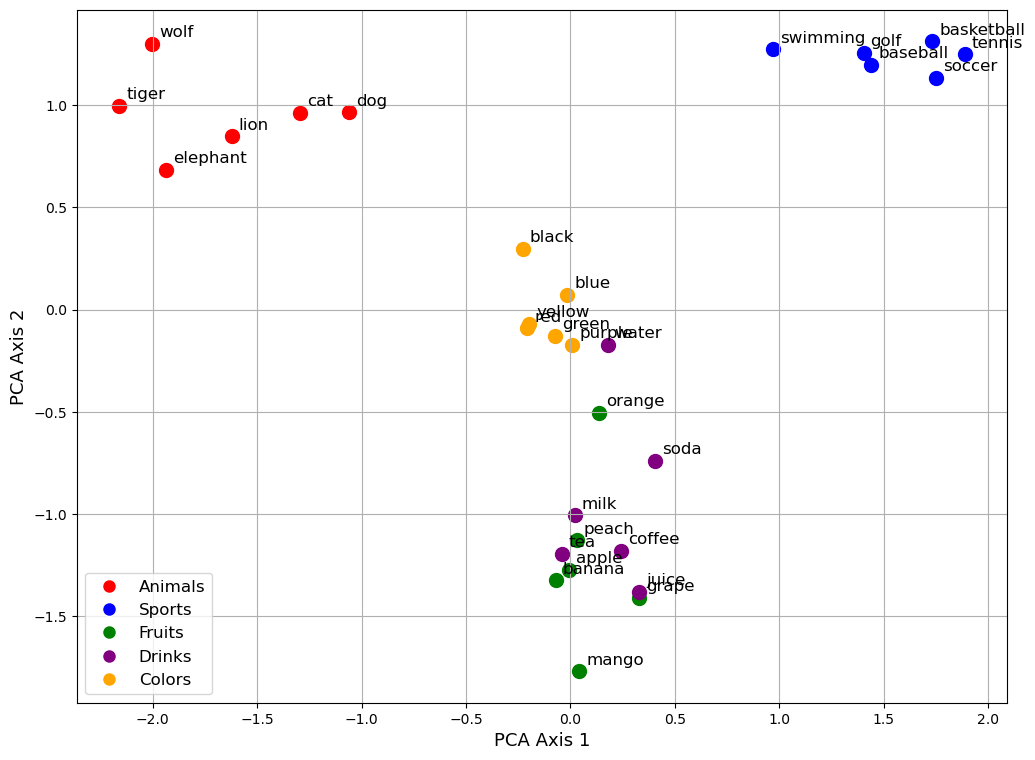

In [ ]:
# PCA를 사용해 2차원으로 차원 축소
pca = PCA(n_components=2, random_state=42)
reduced_vectors = pca.fit_transform(vectors)

# 주제별 색상 지정
category_colors = {
    'Animals': 'red',
    'Sports': 'blue',
    'Fruits': 'green',
    'Drinks': 'purple',
    'Colors': 'orange'
}

# 시각화
plt.figure(figsize=(12, 9))

for idx, (word, coord, category) in enumerate(zip(words, reduced_vectors, categories)):
    plt.scatter(coord[0], coord[1], color=category_colors[category], s=100)
    plt.annotate(word, xy=(coord[0], coord[1]), xytext=(5, 5),
                 textcoords='offset points', fontsize=12)

# 범례 추가
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w', label=cat,
                          markerfacecolor=color, markersize=10)
                   for cat, color in category_colors.items()]

plt.legend(handles=legend_elements, fontsize=12, loc='best')
plt.xlabel('PCA Axis 1', fontsize=13)
plt.ylabel('PCA Axis 2', fontsize=13)
plt.grid(True)
plt.show()